In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1isto1 Single Lane

In [2]:
df_no_net = pd.read_csv("9.11_no1_network.csv", header=1, index_col=0)

In [3]:
df_no_net = df_no_net[:3]

In [4]:
df_no_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,25.711280,28.936477,39,4
120-240,63.638426,10.722398,111,0
240-360,26.993829,4.885620,139,0


In [5]:
df_eq_net = pd.read_csv("9.11_sig1_network.csv", header=1, index_col=0)

In [6]:
df_eq_net = df_eq_net[:4]

In [7]:
df_eq_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,9.922954,41.055983,27,16
120-240,18.901955,33.133626,55,44
240-360,38.173869,21.509455,100,47
360-480,40.701996,13.133142,135,32


In [8]:
df_scat_net = pd.read_csv("9.11_Scats1_network.csv", header=1, index_col=0)

In [9]:
df_scat_net = df_scat_net[:5]

In [10]:
df_scat_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,9.794143,41.303189,26,17
120-240,23.715810,30.083092,63,35
240-360,44.139891,17.690118,112,43
360-480,69.179783,9.485412,144,45
480-600,10.237543,9.216586,145,6


In [11]:
df_scoot_net = pd.read_csv("9.11_Scoot1_network.csv", header=1, index_col=0)

In [12]:
df_scoot_net = df_scoot_net[:5]

In [13]:
df_scoot_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,9.794143,41.303189,26,17
120-240,24.239521,29.698181,64,34
240-360,44.715635,17.365424,112,44
360-480,71.923190,9.187904,141,44
480-600,3.311543,8.554256,140,2


In [14]:
df_ourdec_net = pd.read_csv("9.11_our1_network.csv", header=1, index_col=0)

In [15]:
df_ourdec_net = df_ourdec_net[:5]

In [16]:
df_ourdec_net

,DELAYAVG(ALL),SPEEDAVG(ALL),VEHACT(ALL),VEHARR(ALL)
TIMEINT,,,,
0-120,14.774420,34.865029,31,12
120-240,28.154638,17.324223,61,23
240-360,34.743487,9.735020,82,22
360-480,48.598356,3.153849,113,0
480-600,37.506947,5.545869,131,20


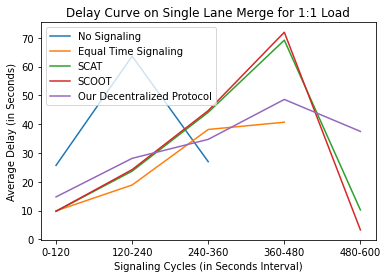

In [17]:
fig = plt.figure()
plt.plot(df_no_net["DELAYAVG(ALL)"], label="No Signaling")
plt.plot(df_eq_net["DELAYAVG(ALL)"], label="Equal Time Signaling")
plt.plot(df_scat_net["DELAYAVG(ALL)"], label="SCAT")
plt.plot(df_scoot_net["DELAYAVG(ALL)"], label="SCOOT")
plt.plot(df_ourdec_net["DELAYAVG(ALL)"], label="Our Decentralized Protocol")
plt.legend()
plt.ylabel("Average Delay (in Seconds)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Delay Curve on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

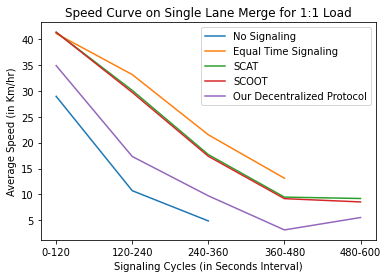

In [18]:
fig = plt.figure()
plt.plot(df_no_net["SPEEDAVG(ALL)"], label="No Signaling")
plt.plot(df_eq_net["SPEEDAVG(ALL)"], label="Equal Time Signaling")
plt.plot(df_scat_net["SPEEDAVG(ALL)"], label="SCAT")
plt.plot(df_scoot_net["SPEEDAVG(ALL)"], label="SCOOT")
plt.plot(df_ourdec_net["SPEEDAVG(ALL)"], label="Our Decentralized Protocol")
plt.legend()
plt.ylabel("Average Speed (in Km/hr)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Speed Curve on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

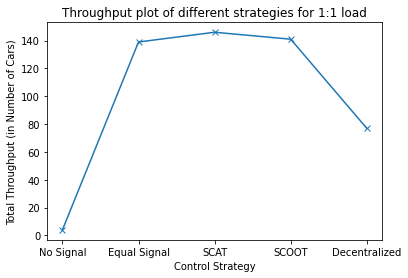

In [21]:
thpt = []
thpt.append(df_no_net["VEHARR(ALL)"].sum())
thpt.append(df_eq_net["VEHARR(ALL)"].sum())
thpt.append(df_scat_net["VEHARR(ALL)"].sum())
thpt.append(df_scoot_net["VEHARR(ALL)"].sum())
thpt.append(df_ourdec_net["VEHARR(ALL)"].sum())

stgy = ["No Signal", "Equal Signal", "SCAT", "SCOOT", "Decentralized"]

fig = plt.figure()
plt.plot(stgy, thpt, '-x')
plt.xlabel("Control Strategy")
plt.ylabel("Total Throughput (in Number of Cars)")
plt.title("Throughput plot of different strategies for 1:1 load")
plt.show()
plt.close(fig)

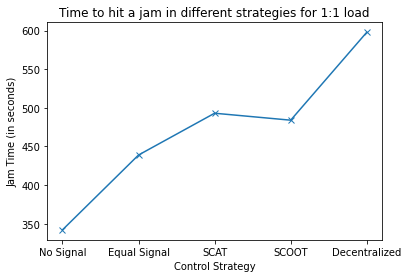

In [54]:
sim_end_time = [342, 438.9, 493, 484, 597.8]
fig = plt.figure()
plt.plot(stgy, sim_end_time, '-x')
plt.xlabel("Control Strategy")
plt.ylabel("Jam Time (in seconds)")
plt.title("Time to hit a jam in different strategies for 1:1 load")
plt.show()
plt.close(fig)

## Fairness Analysis

In [23]:
df_no_link = pd.read_csv("9.11_no1 - links.csv", header=1, index_col=0)

In [25]:
df_no_link = df_no_link[:3]

In [26]:
df_no_link["L1_density"] = (400*df_no_link["L1_density"]+150*df_no_link["L3_density"])/550
df_no_link["L1_delay"] = (df_no_link["L1_delay"].str[:-1]).astype(float)+(df_no_link["L3_delay"].str[:-1]).astype(float)
df_no_link["L1_Speed"] = (550*df_no_link["L1_Speed"]*df_no_link["L3_Speed"])/(400*df_no_link["L3_Speed"]+150*df_no_link["L1_Speed"])
df_no_link = df_no_link.drop(["L3_density", "L3_delay", "L3_Speed"],axis=1)
df_no_link["L2_density"] = (400*df_no_link["L2_density"]+150*df_no_link["L4_density"])/550
df_no_link["L2_delay"] = (df_no_link["L2_delay"].str[:-1]).astype(float)+(df_no_link["L4_delay"].str[:-1]).astype(float)
df_no_link["L2_Speed"] = (550*df_no_link["L2_Speed"]*df_no_link["L4_Speed"])/(400*df_no_link["L2_Speed"]+150*df_no_link["L4_Speed"])
df_no_link = df_no_link.drop(["L4_density", "L4_delay", "L4_Speed"],axis=1)
df_no_link = df_no_link.drop(["L5_density", "L5_delay", "L5_Speed"],axis=1)
df_no_link["Density Ratio"] = df_no_link["L1_density"]/df_no_link["L2_density"]
df_no_link["Delay Ratio"] = df_no_link["L1_delay"]/df_no_link["L2_delay"]
df_no_link["Speed Ratio"] = df_no_link["L1_Speed"]/df_no_link["L2_Speed"]
df_no_link = df_no_link.drop(["L1_density", "L1_delay", "L1_Speed"],axis=1)
df_no_link = df_no_link.drop(["L2_density", "L2_delay", "L2_Speed"],axis=1)
df_no_link.replace([np.inf, -np.inf], np.nan, inplace=True)

/state/partition1/job-37600577/ipykernel_1475120/3505147084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_link["L1_density"] = (400*df_no_link["L1_density"]+150*df_no_link["L3_density"])/550
/state/partition1/job-37600577/ipykernel_1475120/3505147084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_link["L1_delay"] = (df_no_link["L1_delay"].str[:-1]).astype(float)+(df_no_link["L3_delay"].str[:-1]).astype(float)
/state/partition1/job-37600577/ipykernel_1475120/3505147084.py:3: SettingWit

In [27]:
df_no_link

,Density Ratio,Delay Ratio,Speed Ratio
TIMEINT,,,
0-120,1.127104,0.905002,2.205689
120-240,1.097007,1.038640,2.754558
240-360,1.058868,0.994636,2.409138


In [28]:
df_eq_link = pd.read_csv("9.11_sig1 - links.csv", header=1, index_col=0)

In [30]:
df_eq_link = df_eq_link[:4]

In [31]:
df_eq_link["L1_density"] = (400*df_eq_link["L1_density"]+150*df_eq_link["L3_density"])/550
df_eq_link["L1_delay"] = (df_eq_link["L1_delay"].str[:-1]).astype(float)+(df_eq_link["L3_delay"].str[:-1]).astype(float)
df_eq_link["L1_Speed"] = (550*df_eq_link["L1_Speed"]*df_eq_link["L3_Speed"])/(400*df_eq_link["L3_Speed"]+150*df_eq_link["L1_Speed"])
df_eq_link = df_eq_link.drop(["L3_density", "L3_delay", "L3_Speed"],axis=1)
df_eq_link["L2_density"] = (400*df_eq_link["L2_density"]+150*df_eq_link["L4_density"])/550
df_eq_link["L2_delay"] = (df_eq_link["L2_delay"].str[:-1]).astype(float)+(df_eq_link["L4_delay"].str[:-1]).astype(float)
df_eq_link["L2_Speed"] = (550*df_eq_link["L2_Speed"]*df_eq_link["L4_Speed"])/(400*df_eq_link["L2_Speed"]+150*df_eq_link["L4_Speed"])
df_eq_link = df_eq_link.drop(["L4_density", "L4_delay", "L4_Speed"],axis=1)
df_eq_link = df_eq_link.drop(["L5_density", "L5_delay", "L5_Speed"],axis=1)
df_eq_link["Density Ratio"] = df_eq_link["L1_density"]/df_eq_link["L2_density"]
df_eq_link["Delay Ratio"] = df_eq_link["L1_delay"]/df_eq_link["L2_delay"]
df_eq_link["Speed Ratio"] = df_eq_link["L1_Speed"]/df_eq_link["L2_Speed"]
df_eq_link = df_eq_link.drop(["L1_density", "L1_delay", "L1_Speed"],axis=1)
df_eq_link = df_eq_link.drop(["L2_density", "L2_delay", "L2_Speed"],axis=1)
df_eq_link.replace([np.inf, -np.inf], np.nan, inplace=True)

/state/partition1/job-37600577/ipykernel_1475120/2669043782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq_link["L1_density"] = (400*df_eq_link["L1_density"]+150*df_eq_link["L3_density"])/550
/state/partition1/job-37600577/ipykernel_1475120/2669043782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq_link["L1_delay"] = (df_eq_link["L1_delay"].str[:-1]).astype(float)+(df_eq_link["L3_delay"].str[:-1]).astype(float)
/state/partition1/job-37600577/ipykernel_1475120/2669043782.py:3: SettingWit

In [32]:
df_eq_link

,Density Ratio,Delay Ratio,Speed Ratio
TIMEINT,,,
0-120,1.731979,6.088479,0.705164
120-240,1.828209,2.145741,0.551584
240-360,1.728439,1.804328,0.445995
360-480,1.624856,1.362158,0.984980


In [34]:
df_scat_link = pd.read_csv("9.11_Scats1 - links.csv", header=1, index_col=0)

In [36]:
df_scat_link = df_scat_link[:5]

In [37]:
df_scat_link["L1_density"] = (400*df_scat_link["L1_density"]+150*df_scat_link["L3_density"])/550
df_scat_link["L1_delay"] = (df_scat_link["L1_delay"].str[:-1]).astype(float)+(df_scat_link["L3_delay"].str[:-1]).astype(float)
df_scat_link["L1_Speed"] = (550*df_scat_link["L1_Speed"]*df_scat_link["L3_Speed"])/(400*df_scat_link["L3_Speed"]+150*df_scat_link["L1_Speed"])
df_scat_link = df_scat_link.drop(["L3_density", "L3_delay", "L3_Speed"],axis=1)
df_scat_link["L2_density"] = (400*df_scat_link["L2_density"]+150*df_scat_link["L4_density"])/550
df_scat_link["L2_delay"] = (df_scat_link["L2_delay"].str[:-1]).astype(float)+(df_scat_link["L4_delay"].str[:-1]).astype(float)
df_scat_link["L2_Speed"] = (550*df_scat_link["L2_Speed"]*df_scat_link["L4_Speed"])/(400*df_scat_link["L2_Speed"]+150*df_scat_link["L4_Speed"])
df_scat_link = df_scat_link.drop(["L4_density", "L4_delay", "L4_Speed"],axis=1)
df_scat_link = df_scat_link.drop(["L5_density", "L5_delay", "L5_Speed"],axis=1)
df_scat_link["Density Ratio"] = df_scat_link["L1_density"]/df_scat_link["L2_density"]
df_scat_link["Delay Ratio"] = df_scat_link["L1_delay"]/df_scat_link["L2_delay"]
df_scat_link["Speed Ratio"] = df_scat_link["L1_Speed"]/df_scat_link["L2_Speed"]
df_scat_link = df_scat_link.drop(["L1_density", "L1_delay", "L1_Speed"],axis=1)
df_scat_link = df_scat_link.drop(["L2_density", "L2_delay", "L2_Speed"],axis=1)
df_scat_link.replace([np.inf, -np.inf], np.nan, inplace=True)

/state/partition1/job-37600577/ipykernel_1475120/3650826362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scat_link["L1_density"] = (400*df_scat_link["L1_density"]+150*df_scat_link["L3_density"])/550
/state/partition1/job-37600577/ipykernel_1475120/3650826362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scat_link["L1_delay"] = (df_scat_link["L1_delay"].str[:-1]).astype(float)+(df_scat_link["L3_delay"].str[:-1]).astype(float)
/state/partition1/job-37600577/ipykernel_1475120/3650826362.py:3

In [38]:
df_scat_link

,Density Ratio,Delay Ratio,Speed Ratio
TIMEINT,,,
0-120,1.576666,2.558060,0.858274
120-240,1.673846,1.500501,0.684524
240-360,1.546639,1.441818,0.704524
360-480,1.353711,1.137305,0.499504
480-600,1.508600,1.653661,0.000000


In [39]:
df_scoot_link = pd.read_csv("9.11_Scoot1 - links.csv", header=1, index_col=0)

In [40]:
df_scoot_link = df_scoot_link[:5]

In [41]:
df_scoot_link["L1_density"] = (400*df_scoot_link["L1_density"]+150*df_scoot_link["L3_density"])/550
df_scoot_link["L1_delay"] = (df_scoot_link["L1_delay"].str[:-1]).astype(float)+(df_scoot_link["L3_delay"].str[:-1]).astype(float)
df_scoot_link["L1_Speed"] = (550*df_scoot_link["L1_Speed"]*df_scoot_link["L3_Speed"])/(400*df_scoot_link["L3_Speed"]+150*df_scoot_link["L1_Speed"])
df_scoot_link = df_scoot_link.drop(["L3_density", "L3_delay", "L3_Speed"],axis=1)
df_scoot_link["L2_density"] = (400*df_scoot_link["L2_density"]+150*df_scoot_link["L4_density"])/550
df_scoot_link["L2_delay"] = (df_scoot_link["L2_delay"].str[:-1]).astype(float)+(df_scoot_link["L4_delay"].str[:-1]).astype(float)
df_scoot_link["L2_Speed"] = (550*df_scoot_link["L2_Speed"]*df_scoot_link["L4_Speed"])/(400*df_scoot_link["L2_Speed"]+150*df_scoot_link["L4_Speed"])
df_scoot_link = df_scoot_link.drop(["L4_density", "L4_delay", "L4_Speed"],axis=1)
df_scoot_link = df_scoot_link.drop(["L5_density", "L5_delay", "L5_Speed"],axis=1)
df_scoot_link["Density Ratio"] = df_scoot_link["L1_density"]/df_scoot_link["L2_density"]
df_scoot_link["Delay Ratio"] = df_scoot_link["L1_delay"]/df_scoot_link["L2_delay"]
df_scoot_link["Speed Ratio"] = df_scoot_link["L1_Speed"]/df_scoot_link["L2_Speed"]
df_scoot_link = df_scoot_link.drop(["L1_density", "L1_delay", "L1_Speed"],axis=1)
df_scoot_link = df_scoot_link.drop(["L2_density", "L2_delay", "L2_Speed"],axis=1)
df_scoot_link.replace([np.inf, -np.inf], np.nan, inplace=True)

In [42]:
df_scoot_link

,Density Ratio,Delay Ratio,Speed Ratio
TIMEINT,,,
0-120,1.576666,2.558060,0.858274
120-240,1.572753,1.310391,0.847847
240-360,1.323796,1.295626,0.991307
360-480,1.201680,1.084195,0.614141
480-600,1.449326,1.352995,0.002114


In [51]:
df_ourdec_link = pd.read_csv("9.11_our1 - links.csv", header=1, index_col=0)

In [52]:
df_ourdec_link = df_ourdec_link[:5]

In [53]:
df_ourdec_link

,L1_density,L1_delay,L1_Speed,L2_density,L2_delay,L2_Speed,L3_density,L3_delay,L3_Speed,L4_density,L4_delay,L4_Speed,L5_density,L5_delay,L5_Speed
TIMEINT,,,,,,,,,,,,,,,
0-120,12.673782,1.07%,46.577874,9.804311,0.07%,50.075657,28.981381,66.72%,15.524059,16.339342,52.81%,23.190971,8.652817,0.00%,47.284638
120-240,28.942498,4.25%,33.108866,26.034601,32.64%,5.820800,44.872866,56.00%,18.267940,65.343887,98.14%,0.877539,15.811474,0.00%,45.391949
240-360,53.845028,20.32%,7.171233,56.724373,24.38%,11.020206,67.365143,91.29%,3.514473,60.399107,84.88%,6.861350,12.395948,1.56%,46.775803
360-480,78.791097,15.17%,4.711696,70.680201,15.58%,4.777044,101.066572,97.92%,0.780903,112.093061,98.13%,0.476917,0.000000,0.00%,0.000000
480-600,100.023948,11.97%,4.854331,95.825772,11.41%,4.933205,101.529215,88.01%,5.036570,149.236093,97.78%,0.489577,15.370634,1.70%,45.513834


In [46]:
df_ourdec_link["L1_density"] = (400*df_ourdec_link["L1_density"]+150*df_ourdec_link["L3_density"])/550
df_ourdec_link["L1_delay"] = (df_ourdec_link["L1_delay"].str[:-1]).astype(float)+(df_ourdec_link["L3_delay"].str[:-1]).astype(float)
df_ourdec_link["L1_Speed"] = (550*df_ourdec_link["L1_Speed"]*df_ourdec_link["L3_Speed"])/(400*df_ourdec_link["L3_Speed"]+150*df_ourdec_link["L1_Speed"])
df_ourdec_link = df_ourdec_link.drop(["L3_density", "L3_delay", "L3_Speed"],axis=1)
df_ourdec_link["L2_density"] = (400*df_ourdec_link["L2_density"]+150*df_ourdec_link["L4_density"])/550
df_ourdec_link["L2_delay"] = (df_ourdec_link["L2_delay"].str[:-1]).astype(float)+(df_ourdec_link["L4_delay"].str[:-1]).astype(float)
df_ourdec_link["L2_Speed"] = (550*df_ourdec_link["L2_Speed"]*df_ourdec_link["L4_Speed"])/(400*df_ourdec_link["L2_Speed"]+150*df_ourdec_link["L4_Speed"])
df_ourdec_link = df_ourdec_link.drop(["L4_density", "L4_delay", "L4_Speed"],axis=1)
df_ourdec_link = df_ourdec_link.drop(["L5_density", "L5_delay", "L5_Speed"],axis=1)
df_ourdec_link["Density Ratio"] = df_ourdec_link["L1_density"]/df_ourdec_link["L2_density"]
df_ourdec_link["Delay Ratio"] = df_ourdec_link["L1_delay"]/df_ourdec_link["L2_delay"]
df_ourdec_link["Speed Ratio"] = df_ourdec_link["L1_Speed"]/df_ourdec_link["L2_Speed"]
df_ourdec_link = df_ourdec_link.drop(["L1_density", "L1_delay", "L1_Speed"],axis=1)
df_ourdec_link = df_ourdec_link.drop(["L2_density", "L2_delay", "L2_Speed"],axis=1)
df_ourdec_link.replace([np.inf, -np.inf], np.nan, inplace=True)

/state/partition1/job-37600577/ipykernel_1475120/2247310544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ourdec_link["L1_density"] = (400*df_ourdec_link["L1_density"]+150*df_ourdec_link["L3_density"])/550
/state/partition1/job-37600577/ipykernel_1475120/2247310544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ourdec_link["L1_delay"] = (df_ourdec_link["L1_delay"].str[:-1]).astype(float)+(df_ourdec_link["L3_delay"].str[:-1]).astype(float)
/state/partition1/job-37600577/ipykernel_1475120/224

In [47]:
df_ourdec_link

,Density Ratio,Delay Ratio,Speed Ratio
TIMEINT,,,
0-120,1.477683,1.281959,1.109225
120-240,0.905642,0.460697,23.732450
240-360,0.996635,1.021508,0.730343
360-480,1.035274,0.994548,3.141451
480-600,0.909797,0.915652,7.554081


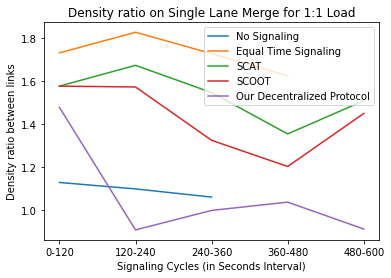

In [48]:
fig = plt.figure()
plt.plot(df_no_link["Density Ratio"], label="No Signaling")
plt.plot(df_eq_link["Density Ratio"], label="Equal Time Signaling")
plt.plot(df_scat_link["Density Ratio"], label="SCAT")
plt.plot(df_scoot_link["Density Ratio"], label="SCOOT")
plt.plot(df_ourdec_link["Density Ratio"], label="Our Decentralized Protocol")
plt.legend()
plt.ylabel("Density ratio between links")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Density ratio on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

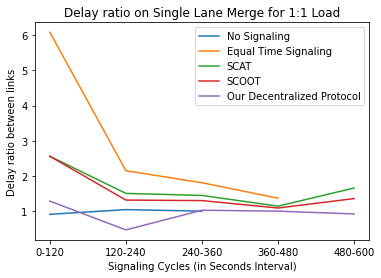

In [49]:
fig = plt.figure()
plt.plot(df_no_link["Delay Ratio"], label="No Signaling")
plt.plot(df_eq_link["Delay Ratio"], label="Equal Time Signaling")
plt.plot(df_scat_link["Delay Ratio"], label="SCAT")
plt.plot(df_scoot_link["Delay Ratio"], label="SCOOT")
plt.plot(df_ourdec_link["Delay Ratio"], label="Our Decentralized Protocol")
plt.legend()
plt.ylabel("Delay ratio between links")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Delay ratio on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)

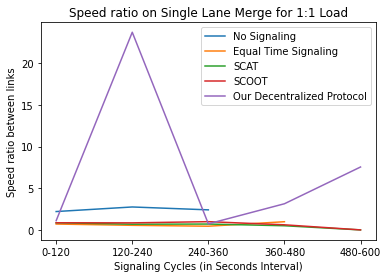

In [50]:
fig = plt.figure()
plt.plot(df_no_link["Speed Ratio"], label="No Signaling")
plt.plot(df_eq_link["Speed Ratio"], label="Equal Time Signaling")
plt.plot(df_scat_link["Speed Ratio"], label="SCAT")
plt.plot(df_scoot_link["Speed Ratio"], label="SCOOT")
plt.plot(df_ourdec_link["Speed Ratio"], label="Our Decentralized Protocol")
plt.legend()
plt.ylabel("Speed ratio between links")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Speed ratio on Single Lane Merge for 1:1 Load")
plt.show()
plt.close(fig)